##  Deep Learning Series 9: Practice about Recurrent Neural Network

### Word Embeddings

We can train a recurrent neural network to predict some dummy data and examine the embedding layer for each vector. 

Reference:

http://ben.bolte.cc/blog/2016/keras-language-modeling.html

In [1]:
import itertools
import numpy as np

from keras.layers import Input, Embedding, merge, Flatten, SimpleRNN
from keras.models import Model

Using Theano backend.


In [2]:
sentences = '''
sam is red
hannah not red
hannah is green
bob is green
bob not red
sam not green
sarah is red
sarah not green'''.strip().split('\n')

In [3]:
sentences

['sam is red',
 'hannah not red',
 'hannah is green',
 'bob is green',
 'bob not red',
 'sam not green',
 'sarah is red',
 'sarah not green']

In [7]:
is_green = np.asarray([[0, 1, 1, 1, 1, 0, 0, 0]], dtype='int32').T

In [8]:
is_green

array([[0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0]])

In [9]:
lemma = lambda x: x.strip().lower().split(' ')
sentences_lemmatized = [lemma(sentence) for sentence in sentences]

In [10]:
sentences_lemmatized

[['sam', 'is', 'red'],
 ['hannah', 'not', 'red'],
 ['hannah', 'is', 'green'],
 ['bob', 'is', 'green'],
 ['bob', 'not', 'red'],
 ['sam', 'not', 'green'],
 ['sarah', 'is', 'red'],
 ['sarah', 'not', 'green']]

In [11]:
words = set(itertools.chain(*sentences_lemmatized))

In [12]:
words

{'bob', 'green', 'hannah', 'is', 'not', 'red', 'sam', 'sarah'}

In [13]:
# dictionaries for converting words to integers and vice versa
word2idx = dict((v, i) for i, v in enumerate(words))
idx2word = list(words)

In [14]:
word2idx

{'bob': 6,
 'green': 4,
 'hannah': 2,
 'is': 3,
 'not': 5,
 'red': 7,
 'sam': 1,
 'sarah': 0}

In [15]:
idx2word

['sarah', 'sam', 'hannah', 'is', 'green', 'not', 'bob', 'red']

In [17]:
# convert the sentences a numpy array
to_idx = lambda x: [word2idx[word] for word in x]
sentences_idx = [to_idx(sentence) for sentence in sentences_lemmatized]
sentences_array = np.asarray(sentences_idx, dtype='int32')

In [18]:
sentences_array

array([[1, 3, 7],
       [2, 5, 7],
       [2, 3, 4],
       [6, 3, 4],
       [6, 5, 7],
       [1, 5, 4],
       [0, 3, 7],
       [0, 5, 4]])

In [20]:
# parameters for the model
sentence_maxlen = 3
n_words = len(words)
n_embed_dims = 3

# put together a model to predict
input_sentence = Input(shape=(sentence_maxlen,), dtype='int32')
input_embedding = Embedding(n_words, n_embed_dims)(input_sentence)
color_prediction = SimpleRNN(1)(input_embedding)

predict_green = Model(inputs=[input_sentence], outputs=[color_prediction])
predict_green.compile(optimizer='sgd', loss='binary_crossentropy')

In [ ]:
# fit the model to predict what color each person is
predict_green.fit([sentences_array], [is_green], epochs=3500, verbose=1)

Epoch 1/3500
8/8 [==============================] - 0s - loss: 8.0590
Epoch 2/3500
8/8 [==============================] - 0s - loss: 8.0590
Epoch 3/3500
8/8 [==============================] - 0s - loss: 8.0590
Epoch 4/3500
8/8 [==============================] - 0s - loss: 8.0590
Epoch 5/3500
8/8 [==============================] - 0s - loss: 8.0590
Epoch 6/3500
8/8 [==============================] - 0s - loss: 8.0590
Epoch 7/3500
8/8 [==============================] - 0s - loss: 8.0590
Epoch 8/3500
8/8 [==============================] - 0s - loss: 8.0590
Epoch 9/3500
8/8 [==============================] - 0s - loss: 8.0590
Epoch 10/3500
8/8 [==============================] - 0s - loss: 8.0590
Epoch 11/3500
8/8 [==============================] - 0s - loss: 8.0590
Epoch 12/3500
8/8 [==============================] - 0s - loss: 8.0590
Epoch 13/3500
8/8 [==============================] - 0s - loss: 8.0590
Epoch 14/3500
8/8 [==============================] - 0s - loss: 8.0590
Epoch 15/3500
8

In [42]:
embeddings = predict_green.layers[1].get_weights()

# print out the embedding vector associated with each word
for i in range(n_words):
    print('{}: {}'.format(idx2word[i], embeddings[0][i]))

sarah: [ 0.04073766  0.0301988   0.02561003]
sam: [-0.01827174  0.04471514  0.02701684]
hannah: [ 0.01136246  0.01135673  0.02530763]
is: [ 0.04138496 -0.01760237 -0.03393453]
green: [ 0.01369022  0.01608528 -0.03224596]
not: [ 0.00932066 -0.00082288 -0.05020336]
bob: [ 0.02244482  0.00275357 -0.02473369]
red: [ 0.04399865  0.01837367 -0.03211283]


### RNN Example: Predicting Dummy Data

In [53]:
from IPython.display import Image

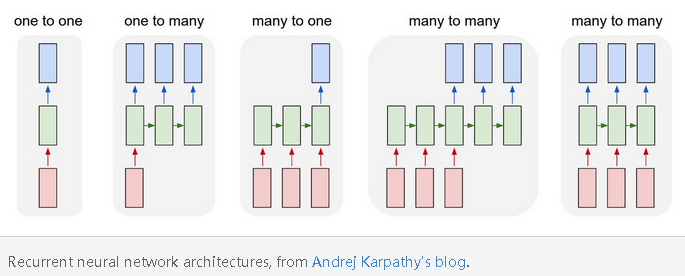

In [54]:
Image('rnn.PNG')

In [43]:
from keras.layers.recurrent import SimpleRNN, LSTM, GRU

In [44]:
rng = np.random.RandomState(42)

# parameters
input_dims, output_dims = 10, 1
sequence_length = 20
n_test = 10

# generate some random data to train on
get_rand = lambda *shape: np.asarray(rng.rand(*shape) > 0.5, dtype='float32')
X_data = np.asarray([get_rand(sequence_length, input_dims) for _ in range(n_test)])
y_data = np.asarray([get_rand(output_dims,) for _ in range(n_test)])

In [46]:
y_data

array([[ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.]], dtype=float32)

In [47]:
input_sequence = Input(shape=(sequence_length, input_dims,), dtype='float32')

vanilla = SimpleRNN(output_dims, return_sequences=False)(input_sequence)
lstm = LSTM(output_dims, return_sequences=False)(input_sequence)
gru = GRU(output_dims, return_sequences=False)(input_sequence)
rnns = [vanilla, lstm, gru]

In [49]:
model = Model(inputs=[input_sequence], outputs=rnns[0])
model.compile(optimizer='rmsprop', loss='binary_crossentropy')
model.fit([X_data], [y_data], epochs=1000)

Epoch 1/1000
10/10 [==============================] - 0s - loss: 0.0453
Epoch 2/1000
10/10 [==============================] - 0s - loss: 0.0463
Epoch 3/1000
10/10 [==============================] - 0s - loss: 0.0447
Epoch 4/1000
10/10 [==============================] - 0s - loss: 0.0437
Epoch 5/1000
10/10 [==============================] - 0s - loss: 0.0438
Epoch 6/1000
10/10 [==============================] - 0s - loss: 0.0438
Epoch 7/1000
10/10 [==============================] - 0s - loss: 0.0433
Epoch 8/1000
10/10 [==============================] - 0s - loss: 0.0428
Epoch 9/1000
10/10 [==============================] - 0s - loss: 0.0426
Epoch 10/1000
10/10 [==============================] - 0s - loss: 0.0423
Epoch 11/1000
10/10 [==============================] - 0s - loss: 0.0423
Epoch 12/1000
10/10 [==============================] - 0s - loss: 0.0418
Epoch 13/1000
10/10 [==============================] - 0s - loss: 0.0420
Epoch 14/1000
10/10 [==============================] - 0s - 

In [50]:
model = Model(inputs=[input_sequence], outputs=rnns[1])
model.compile(optimizer='rmsprop', loss='binary_crossentropy')
model.fit([X_data], [y_data], epochs=1000)

TypeError: The broadcast pattern of the output of scan (TensorType(float32, 3D)) is inconsistent with the one provided in `output_info` (TensorType(float32, col)). The output on axis 1 is `False`, but it is `True` on axis 2 in `output_info`. This can happen if one of the dimension is fixed to 1 in the input, while it is still variable in the output, or vice-verca. You have to make them consistent, e.g. using theano.tensor.{patternbroadcast,unbroadcast,addbroadcast}.

In [51]:
model = Model(inputs=[input_sequence], outputs=rnns[2])
model.compile(optimizer='rmsprop', loss='binary_crossentropy')
model.fit([X_data], [y_data], epochs=1000)

Epoch 1/1000
10/10 [==============================] - 0s - loss: 3.3733
Epoch 2/1000
10/10 [==============================] - 0s - loss: 3.3699
Epoch 3/1000
10/10 [==============================] - 0s - loss: 3.3675
Epoch 4/1000
10/10 [==============================] - 0s - loss: 3.3656
Epoch 5/1000
10/10 [==============================] - 0s - loss: 3.3638
Epoch 6/1000
10/10 [==============================] - 0s - loss: 3.3622
Epoch 7/1000
10/10 [==============================] - 0s - loss: 3.3607
Epoch 8/1000
10/10 [==============================] - 0s - loss: 3.3593
Epoch 9/1000
10/10 [==============================] - 0s - loss: 3.3579
Epoch 10/1000
10/10 [==============================] - 0s - loss: 3.3566
Epoch 11/1000
10/10 [==============================] - 0s - loss: 3.3554
Epoch 12/1000
10/10 [==============================] - 0s - loss: 3.3541
Epoch 13/1000
10/10 [==============================] - 0s - loss: 3.3529
Epoch 14/1000
10/10 [==============================] - 0s - 

### InsuranceQA Model Example

Reference:
https://github.com/codekansas/keras-language-modeling
http://ben.bolte.cc/blog/2016/keras-language-modeling.html
https://github.com/shuzi/insuranceQA/tree/master/V2
http://www.52nlp.cn/qa%E9%97%AE%E7%AD%94%E7%B3%BB%E7%BB%9F%E4%B8%AD%E7%9A%84%E6%B7%B1%E5%BA%A6%E5%AD%A6%E4%B9%A0%E6%8A%80%E6%9C%AF%E5%AE%9E%E7%8E%B0

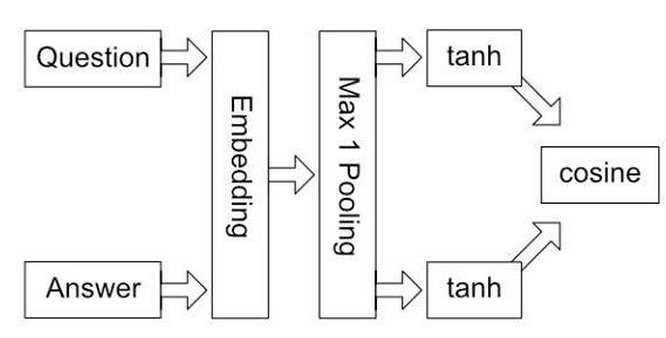

In [55]:
Image('qa1.PNG')